In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [2]:
def load_imdb_data(num_words=10000, maxlen=200):
    """Load and preprocess the IMDB dataset."""
    print("Loading IMDB dataset...")
    (X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)
    
    # Pad sequences to ensure uniform length
    X_train = pad_sequences(X_train, maxlen=maxlen)
    X_test = pad_sequences(X_test, maxlen=maxlen)
    
    return (X_train, y_train), (X_test, y_test)

# Load and preprocess data
(X_train, y_train), (X_test, y_test) = load_imdb_data()

# Create validation split
val_samples = 10000
X_val = X_train[:val_samples]
y_val = y_train[:val_samples]
X_train = X_train[val_samples:]
y_train = y_train[val_samples:]

print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")

Loading IMDB dataset...
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Training set shape: (15000, 200)
Validation set shape: (10000, 200)
Test set shape: (25000, 200)


In [3]:
def create_model(num_words=10000, maxlen=200):
    """Creates a hybrid CNN-LSTM model for sentiment classification."""
    model = tf.keras.Sequential([
        # Input and Embedding layer
        tf.keras.layers.Embedding(num_words, 128, input_length=maxlen),
        
        # 1D Convolutional layer for feature extraction
        tf.keras.layers.Conv1D(64, 5, activation='relu'),
        tf.keras.layers.MaxPooling1D(2),
        
        # LSTM layers for sequential pattern learning
        tf.keras.layers.LSTM(64, return_sequences=True),
        tf.keras.layers.LSTM(32),
        
        # Dense layers with dropout
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        
        # Output layer
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    return model

# Create and compile model
model = create_model()
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Training parameters
BATCH_SIZE = 128
EPOCHS = 10

# Callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=2
    )
]

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_val, y_val),
    callbacks=callbacks,
    verbose=1
)

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 40s 284ms/step - accuracy: 0.5785 - loss: 0.6483 - val_accuracy: 0.8532 - val_loss: 0.3470 - learning_rate: 0.0010
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 40s 277ms/step - accuracy: 0.8806 - loss: 0.3171 - val_accuracy: 0.8765 - val_loss: 0.3151 - learning_rate: 0.0010
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 32s 275ms/step - accuracy: 0.9265 - loss: 0.2089 - val_accuracy: 0.8613 - val_loss: 0.4083 - learning_rate: 0.0010
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 33s 281ms/step - accuracy: 0.9480 - loss: 0.1538 - val_accuracy: 0.8705 - val_loss: 0.4450 - learning_rate: 0.0010
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 33s 280ms/step - accuracy: 0.9811 - loss: 0.0703 - val_accuracy: 0.8710 - val_loss: 0.4480 - learning_rate: 2.0000e-04


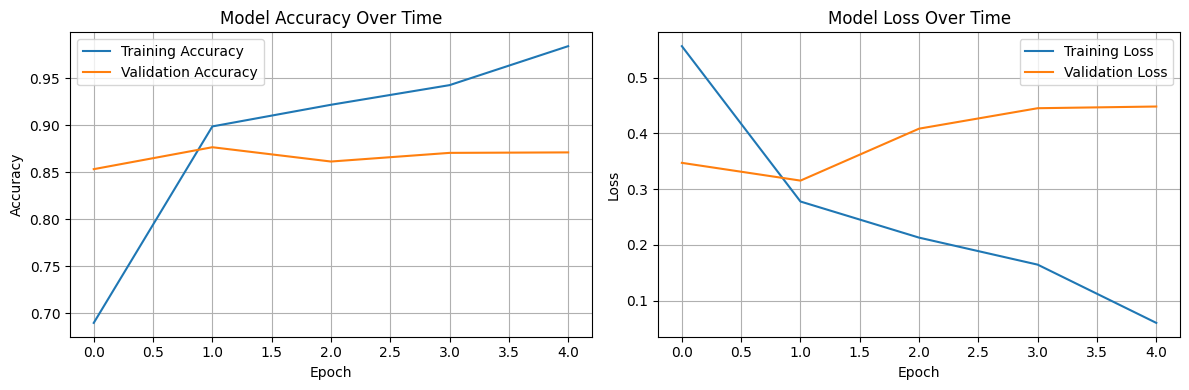

In [5]:
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Time')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Test Accuracy: 0.8672

Sample Predictions vs Actual Labels:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Predicted: Negative (confidence: 0.92), Actual: Negative
Predicted: Positive (confidence: 0.99), Actual: Positive
Predicted: Positive (confidence: 0.92), Actual: Positive
Predicted: Positive (confidence: 0.53), Actual: Negative
Predicted: Positive (confidence: 0.99), Actual: Positive
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step


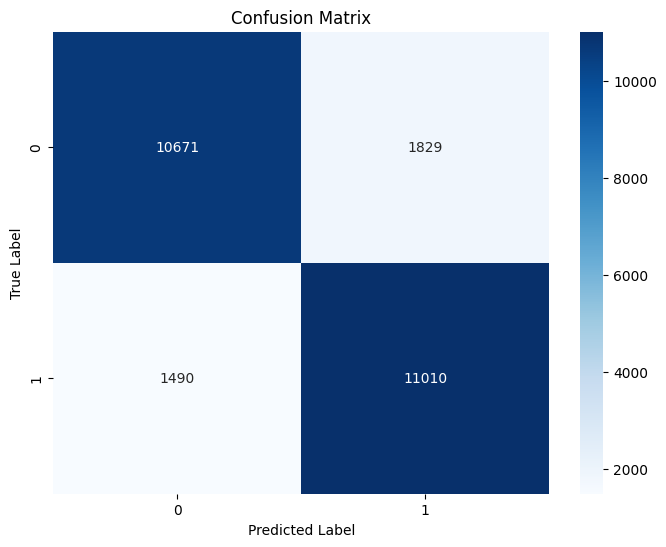

In [7]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_accuracy:.4f}")

# Make predictions on test samples
print("\nSample Predictions vs Actual Labels:")
predictions = model.predict(X_test[:5])
for pred, actual in zip(predictions, y_test[:5]):
    sentiment = "Positive" if pred > 0.5 else "Negative"
    actual_sentiment = "Positive" if actual == 1 else "Negative"
    confidence = pred if pred > 0.5 else 1 - pred
    print(f"Predicted: {sentiment} (confidence: {confidence[0]:.2f}), Actual: {actual_sentiment}")

# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = (model.predict(X_test) > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [8]:
def predict_review(review_text):
    # Load the word index
    word_index = imdb.get_word_index()
    
    # Preprocess the review
    review_text = review_text.lower()
    words = review_text.split()
    sequence = [word_index.get(word, 0) for word in words]
    sequence = pad_sequences([sequence], maxlen=200)
    
    # Make prediction
    prediction = model.predict(sequence)[0][0]
    sentiment = "Positive" if prediction > 0.5 else "Negative"
    confidence = prediction if prediction > 0.5 else 1 - prediction
    
    return sentiment, confidence

# Try with a sample review
sample_review = "This movie was fantastic! The acting was great and the story kept me engaged throughout."
sentiment, confidence = predict_review(sample_review)
print(f"Review: {sample_review}")
print(f"Prediction: {sentiment} (confidence: {confidence:.2f})")

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
Review: This movie was fantastic! The acting was great and the story kept me engaged throughout.
Prediction: Negative (confidence: 0.52)
